# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_safari, load_cifar10
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


In [2]:
RUN_ID = '0027'
RUN_FOLDER = os.path.join("./run", RUN_ID)
DATA_FOLDER = './data/celeb/'

BATCH_SIZE = 64
IMAGE_SIZE = 64

## data

In [3]:
data_gen = ImageDataGenerator(preprocessing_function=lambda x: (x.astype('float32') - 127.5) / 127.5)

x_train = data_gen.flow_from_directory(DATA_FOLDER
                                         , target_size = (IMAGE_SIZE,IMAGE_SIZE)
                                         , batch_size = BATCH_SIZE
                                         , shuffle = True
                                         , class_mode = 'input'
                                         , subset = "training"
                                            )

Found 202599 images belonging to 1 classes.


## architecture

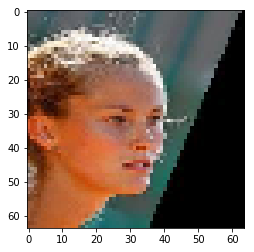

In [4]:
plt.imshow((x_train[0][0][0]+1)/2)

In [5]:
print(np.min(x_train[0][0]))
print(np.max(x_train[0][0]))

-1.0
1.0


In [6]:
#works

gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [2,2,2, 2]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

gan.save(RUN_FOLDER)

In [7]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [8]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

In [9]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
__________

## training

In [23]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 5
    , n_critic = 5
    , using_generator = True
)

421 (5, 1) [D loss: (-14.0)(R -78.2, F 61.6, G 0.3)] [G loss: -62.9]
422 (5, 1) [D loss: (-8.8)(R -83.6, F 72.6, G 0.2)] [G loss: -57.1]
423 (5, 1) [D loss: (-10.5)(R -66.7, F 54.3, G 0.2)] [G loss: -59.5]
424 (5, 1) [D loss: (-11.2)(R -58.7, F 45.1, G 0.2)] [G loss: -48.6]
425 (5, 1) [D loss: (-12.6)(R -73.6, F 58.5, G 0.3)] [G loss: -62.1]
426 (5, 1) [D loss: (-13.7)(R -80.5, F 65.2, G 0.2)] [G loss: -69.6]
427 (5, 1) [D loss: (-15.1)(R -79.8, F 62.4, G 0.2)] [G loss: -77.0]
428 (5, 1) [D loss: (-10.7)(R -67.6, F 55.2, G 0.2)] [G loss: -60.0]
429 (5, 1) [D loss: (-12.6)(R -73.3, F 57.9, G 0.3)] [G loss: -56.1]
430 (5, 1) [D loss: (-12.9)(R -81.6, F 65.9, G 0.3)] [G loss: -61.6]
431 (5, 1) [D loss: (-10.5)(R -84.2, F 72.0, G 0.2)] [G loss: -79.6]
432 (5, 1) [D loss: (-9.4)(R -92.2, F 80.2, G 0.3)] [G loss: -70.8]
433 (5, 1) [D loss: (-10.3)(R -63.6, F 51.9, G 0.1)] [G loss: -58.1]
434 (5, 1) [D loss: (-10.0)(R -67.4, F 56.4, G 0.1)] [G loss: -61.3]
435 (5, 1) [D loss: (-10.8)(R -65.0,

541 (5, 1) [D loss: (-11.5)(R -58.6, F 45.5, G 0.2)] [G loss: -45.7]
542 (5, 1) [D loss: (-11.6)(R -49.3, F 36.5, G 0.1)] [G loss: -41.1]
543 (5, 1) [D loss: (-11.5)(R -51.7, F 38.1, G 0.2)] [G loss: -40.6]
544 (5, 1) [D loss: (-12.1)(R -49.6, F 35.6, G 0.2)] [G loss: -42.1]
545 (5, 1) [D loss: (-9.8)(R -47.6, F 36.8, G 0.1)] [G loss: -35.7]
546 (5, 1) [D loss: (-12.3)(R -55.1, F 40.2, G 0.3)] [G loss: -40.9]
547 (5, 1) [D loss: (-11.0)(R -49.9, F 37.5, G 0.1)] [G loss: -34.9]
548 (5, 1) [D loss: (-10.1)(R -38.1, F 26.6, G 0.1)] [G loss: -23.2]
549 (5, 1) [D loss: (-9.7)(R -40.9, F 29.4, G 0.2)] [G loss: -29.3]
550 (5, 1) [D loss: (-11.0)(R -41.1, F 28.0, G 0.2)] [G loss: -27.8]
551 (5, 1) [D loss: (-11.9)(R -44.9, F 30.2, G 0.3)] [G loss: -29.2]
552 (5, 1) [D loss: (-11.4)(R -41.5, F 28.5, G 0.2)] [G loss: -27.6]
553 (5, 1) [D loss: (-11.6)(R -58.4, F 44.0, G 0.3)] [G loss: -44.0]
554 (5, 1) [D loss: (-9.5)(R -49.0, F 37.6, G 0.2)] [G loss: -38.4]
555 (5, 1) [D loss: (-11.2)(R -48.7, 

660 (5, 1) [D loss: (-15.6)(R -47.4, F 29.2, G 0.3)] [G loss: -41.5]
661 (5, 1) [D loss: (-12.3)(R -36.1, F 22.0, G 0.2)] [G loss: -35.0]
662 (5, 1) [D loss: (-10.9)(R -35.5, F 23.4, G 0.1)] [G loss: -23.2]
663 (5, 1) [D loss: (-11.7)(R -33.1, F 19.6, G 0.2)] [G loss: -18.2]
664 (5, 1) [D loss: (-10.2)(R -42.9, F 30.0, G 0.3)] [G loss: -28.4]
665 (5, 1) [D loss: (-13.1)(R -39.2, F 23.7, G 0.2)] [G loss: -32.9]
666 (5, 1) [D loss: (-8.3)(R -37.9, F 26.9, G 0.3)] [G loss: -24.2]
667 (5, 1) [D loss: (-9.8)(R -31.0, F 18.9, G 0.2)] [G loss: -26.2]
668 (5, 1) [D loss: (-11.5)(R -38.3, F 25.2, G 0.2)] [G loss: -21.7]
669 (5, 1) [D loss: (-10.2)(R -33.6, F 21.5, G 0.2)] [G loss: -21.4]
670 (5, 1) [D loss: (-10.4)(R -28.4, F 15.2, G 0.3)] [G loss: -14.9]
671 (5, 1) [D loss: (-10.8)(R -43.2, F 30.8, G 0.2)] [G loss: -35.5]
672 (5, 1) [D loss: (-9.8)(R -40.6, F 28.9, G 0.2)] [G loss: -22.7]
673 (5, 1) [D loss: (-11.1)(R -45.3, F 32.3, G 0.2)] [G loss: -26.1]
674 (5, 1) [D loss: (-11.0)(R -42.8, 

780 (5, 1) [D loss: (-12.5)(R -24.0, F 9.7, G 0.2)] [G loss: -8.2]
781 (5, 1) [D loss: (-10.8)(R -34.7, F 21.9, G 0.2)] [G loss: -22.9]
782 (5, 1) [D loss: (-9.9)(R -31.4, F 20.4, G 0.1)] [G loss: -23.6]
783 (5, 1) [D loss: (-10.4)(R -28.1, F 16.1, G 0.2)] [G loss: -21.9]
784 (5, 1) [D loss: (-11.0)(R -23.4, F 9.7, G 0.3)] [G loss: -5.8]
785 (5, 1) [D loss: (-10.9)(R -38.3, F 24.8, G 0.3)] [G loss: -17.2]
786 (5, 1) [D loss: (-10.2)(R -27.9, F 15.5, G 0.2)] [G loss: -16.9]
787 (5, 1) [D loss: (-11.6)(R -34.2, F 20.5, G 0.2)] [G loss: -21.9]
788 (5, 1) [D loss: (-12.4)(R -31.3, F 17.3, G 0.2)] [G loss: -20.4]
789 (5, 1) [D loss: (-7.6)(R -38.3, F 29.0, G 0.2)] [G loss: -19.7]
790 (5, 1) [D loss: (-9.8)(R -29.7, F 18.7, G 0.1)] [G loss: -20.1]
791 (5, 1) [D loss: (-9.4)(R -24.7, F 13.6, G 0.2)] [G loss: -13.0]
792 (5, 1) [D loss: (-11.8)(R -26.2, F 12.7, G 0.2)] [G loss: -14.7]
793 (5, 1) [D loss: (-12.5)(R -25.1, F 11.7, G 0.1)] [G loss: -14.2]
794 (5, 1) [D loss: (-10.3)(R -25.1, F 12.

900 (5, 1) [D loss: (-10.8)(R -27.2, F 14.3, G 0.2)] [G loss: -11.7]
901 (5, 1) [D loss: (-10.4)(R -26.4, F 14.2, G 0.2)] [G loss: -11.5]
902 (5, 1) [D loss: (-9.4)(R -27.2, F 16.1, G 0.2)] [G loss: -4.8]
903 (5, 1) [D loss: (-10.7)(R -27.0, F 14.4, G 0.2)] [G loss: -12.9]
904 (5, 1) [D loss: (-10.4)(R -19.8, F 7.2, G 0.2)] [G loss: -16.7]
905 (5, 1) [D loss: (-9.4)(R -25.9, F 14.4, G 0.2)] [G loss: -12.5]
906 (5, 1) [D loss: (-10.4)(R -29.2, F 17.0, G 0.2)] [G loss: -18.0]
907 (5, 1) [D loss: (-10.0)(R -13.9, F 1.9, G 0.2)] [G loss: -6.3]
908 (5, 1) [D loss: (-9.9)(R -19.3, F 7.4, G 0.2)] [G loss: -10.3]
909 (5, 1) [D loss: (-10.7)(R -30.7, F 17.4, G 0.3)] [G loss: -14.9]
910 (5, 1) [D loss: (-10.7)(R -27.8, F 14.8, G 0.2)] [G loss: -12.9]
911 (5, 1) [D loss: (-9.7)(R -31.8, F 19.7, G 0.2)] [G loss: -19.6]
912 (5, 1) [D loss: (-10.8)(R -28.5, F 16.1, G 0.2)] [G loss: -13.4]
913 (5, 1) [D loss: (-10.6)(R -11.1, F -1.1, G 0.2)] [G loss: -0.1]
914 (5, 1) [D loss: (-10.0)(R -29.7, F 17.3,

1021 (5, 1) [D loss: (-9.6)(R -6.9, F -4.8, G 0.2)] [G loss: -1.8]
1022 (5, 1) [D loss: (-9.7)(R -23.4, F 11.5, G 0.2)] [G loss: -13.6]
1023 (5, 1) [D loss: (-10.2)(R -19.9, F 8.3, G 0.1)] [G loss: -7.3]
1024 (5, 1) [D loss: (-10.7)(R -30.3, F 17.7, G 0.2)] [G loss: -21.6]
1025 (5, 1) [D loss: (-10.8)(R -19.1, F 7.0, G 0.1)] [G loss: -7.3]
1026 (5, 1) [D loss: (-11.1)(R -21.2, F 8.5, G 0.2)] [G loss: -13.2]
1027 (5, 1) [D loss: (-8.0)(R -26.0, F 16.9, G 0.1)] [G loss: -11.2]
1028 (5, 1) [D loss: (-10.4)(R -20.9, F 8.8, G 0.2)] [G loss: -1.9]
1029 (5, 1) [D loss: (-10.5)(R -29.2, F 16.7, G 0.2)] [G loss: -15.2]
1030 (5, 1) [D loss: (-10.5)(R -15.0, F 2.3, G 0.2)] [G loss: -1.6]
1031 (5, 1) [D loss: (-9.9)(R -15.3, F 4.1, G 0.1)] [G loss: -11.1]
1032 (5, 1) [D loss: (-10.9)(R -21.2, F 8.4, G 0.2)] [G loss: -7.2]
1033 (5, 1) [D loss: (-10.1)(R -18.8, F 6.5, G 0.2)] [G loss: 0.1]
1034 (5, 1) [D loss: (-10.4)(R -30.6, F 17.8, G 0.2)] [G loss: -12.1]
1035 (5, 1) [D loss: (-12.3)(R -24.0, F 1

1141 (5, 1) [D loss: (-13.2)(R -24.5, F 9.1, G 0.2)] [G loss: -13.2]
1142 (5, 1) [D loss: (-13.1)(R -24.2, F 9.8, G 0.1)] [G loss: -9.0]
1143 (5, 1) [D loss: (-9.8)(R -22.0, F 10.7, G 0.2)] [G loss: -7.0]
1144 (5, 1) [D loss: (-9.4)(R -15.5, F 3.4, G 0.3)] [G loss: 0.2]
1145 (5, 1) [D loss: (-9.8)(R -15.0, F 3.5, G 0.2)] [G loss: 2.1]
1146 (5, 1) [D loss: (-11.0)(R -21.0, F 7.8, G 0.2)] [G loss: -13.5]
1147 (5, 1) [D loss: (-10.0)(R -18.3, F 6.0, G 0.2)] [G loss: -10.7]
1148 (5, 1) [D loss: (-9.5)(R -9.0, F -2.2, G 0.2)] [G loss: -2.5]
1149 (5, 1) [D loss: (-10.8)(R -23.0, F 9.9, G 0.2)] [G loss: 1.8]
1150 (5, 1) [D loss: (-10.2)(R -17.9, F 6.4, G 0.1)] [G loss: -7.3]
1151 (5, 1) [D loss: (-6.4)(R -12.5, F 3.5, G 0.3)] [G loss: -4.4]
1152 (5, 1) [D loss: (-11.7)(R -32.8, F 18.3, G 0.3)] [G loss: -18.6]
1153 (5, 1) [D loss: (-10.3)(R -23.5, F 11.6, G 0.1)] [G loss: -13.7]
1154 (5, 1) [D loss: (-10.4)(R -19.0, F 6.1, G 0.2)] [G loss: -3.2]
1155 (5, 1) [D loss: (-9.6)(R -18.0, F 6.2, G 0.

1262 (5, 1) [D loss: (-10.6)(R -6.7, F -6.1, G 0.2)] [G loss: 6.0]
1263 (5, 1) [D loss: (-11.8)(R -16.5, F 3.2, G 0.1)] [G loss: -7.4]
1264 (5, 1) [D loss: (-11.4)(R -18.7, F 5.2, G 0.2)] [G loss: 2.1]
1265 (5, 1) [D loss: (-12.3)(R -25.6, F 10.9, G 0.2)] [G loss: -16.4]
1266 (5, 1) [D loss: (-8.2)(R -7.5, F -2.2, G 0.1)] [G loss: 2.2]
1267 (5, 1) [D loss: (-9.8)(R -2.7, F -8.7, G 0.2)] [G loss: 7.2]
1268 (5, 1) [D loss: (-9.9)(R -11.9, F 0.2, G 0.2)] [G loss: -2.0]
1269 (5, 1) [D loss: (-11.8)(R -16.2, F 3.2, G 0.1)] [G loss: -3.3]
1270 (5, 1) [D loss: (-10.1)(R -10.4, F -1.3, G 0.2)] [G loss: 0.7]
1271 (5, 1) [D loss: (-8.6)(R -11.9, F 2.1, G 0.1)] [G loss: -0.0]
1272 (5, 1) [D loss: (-9.6)(R -13.6, F 2.8, G 0.1)] [G loss: -3.0]
1273 (5, 1) [D loss: (-11.1)(R -12.8, F 0.5, G 0.1)] [G loss: 0.5]
1274 (5, 1) [D loss: (-8.9)(R -15.2, F 5.2, G 0.1)] [G loss: -0.5]
1275 (5, 1) [D loss: (-9.5)(R -22.6, F 10.5, G 0.3)] [G loss: -9.8]
1276 (5, 1) [D loss: (-10.2)(R -17.2, F 4.5, G 0.2)] [G l

1384 (5, 1) [D loss: (-9.5)(R -16.9, F 5.3, G 0.2)] [G loss: -5.4]
1385 (5, 1) [D loss: (-9.5)(R -4.8, F -6.6, G 0.2)] [G loss: 4.2]
1386 (5, 1) [D loss: (-11.8)(R -10.4, F -3.5, G 0.2)] [G loss: 6.6]
1387 (5, 1) [D loss: (-10.5)(R -14.0, F 2.0, G 0.1)] [G loss: -3.5]
1388 (5, 1) [D loss: (-7.9)(R -2.7, F -6.8, G 0.2)] [G loss: 8.6]
1389 (5, 1) [D loss: (-9.4)(R -15.6, F 4.9, G 0.1)] [G loss: -5.7]
1390 (5, 1) [D loss: (-9.4)(R -23.1, F 11.4, G 0.2)] [G loss: -10.6]
1391 (5, 1) [D loss: (-9.7)(R -10.6, F -0.4, G 0.1)] [G loss: -2.0]
1392 (5, 1) [D loss: (-10.8)(R -12.5, F -0.2, G 0.2)] [G loss: -1.8]
1393 (5, 1) [D loss: (-10.0)(R -17.1, F 5.6, G 0.1)] [G loss: -9.0]
1394 (5, 1) [D loss: (-9.9)(R -16.7, F 4.0, G 0.3)] [G loss: -0.5]
1395 (5, 1) [D loss: (-9.6)(R -5.4, F -6.5, G 0.2)] [G loss: 5.3]
1396 (5, 1) [D loss: (-8.7)(R -20.1, F 9.2, G 0.2)] [G loss: -6.8]
1397 (5, 1) [D loss: (-11.1)(R -11.6, F -0.8, G 0.1)] [G loss: -0.2]
1398 (5, 1) [D loss: (-8.6)(R -15.4, F 5.1, G 0.2)] [G 

1506 (5, 1) [D loss: (-8.7)(R -7.1, F -3.0, G 0.1)] [G loss: 5.3]
1507 (5, 1) [D loss: (-10.0)(R -8.3, F -2.9, G 0.1)] [G loss: 4.9]
1508 (5, 1) [D loss: (-9.0)(R -1.4, F -8.6, G 0.1)] [G loss: 6.2]
1509 (5, 1) [D loss: (-9.5)(R -15.1, F 3.9, G 0.2)] [G loss: -1.3]
1510 (5, 1) [D loss: (-9.7)(R -11.8, F 0.3, G 0.2)] [G loss: 0.4]
1511 (5, 1) [D loss: (-9.6)(R -18.3, F 6.9, G 0.2)] [G loss: -6.5]
1512 (5, 1) [D loss: (-10.2)(R -16.1, F 4.3, G 0.2)] [G loss: -1.3]
1513 (5, 1) [D loss: (-10.5)(R -5.1, F -7.4, G 0.2)] [G loss: 4.9]
1514 (5, 1) [D loss: (-9.1)(R -17.8, F 6.8, G 0.2)] [G loss: -5.0]
1515 (5, 1) [D loss: (-9.2)(R -10.5, F 0.0, G 0.1)] [G loss: -3.4]
1516 (5, 1) [D loss: (-9.1)(R -22.1, F 10.8, G 0.2)] [G loss: -4.6]
1517 (5, 1) [D loss: (-9.4)(R -11.7, F 0.9, G 0.1)] [G loss: -7.0]
1518 (5, 1) [D loss: (-9.9)(R -17.9, F 5.6, G 0.2)] [G loss: -10.1]
1519 (5, 1) [D loss: (-9.9)(R -13.2, F 2.0, G 0.1)] [G loss: -1.1]
1520 (5, 1) [D loss: (-9.8)(R -8.5, F -2.6, G 0.1)] [G loss: 3

1629 (5, 1) [D loss: (-9.5)(R -6.8, F -3.8, G 0.1)] [G loss: 3.5]
1630 (5, 1) [D loss: (-8.9)(R -21.8, F 10.9, G 0.2)] [G loss: -9.1]
1631 (5, 1) [D loss: (-9.6)(R -20.8, F 9.4, G 0.2)] [G loss: -9.0]
1632 (5, 1) [D loss: (-10.0)(R -14.8, F 3.4, G 0.1)] [G loss: -1.6]
1633 (5, 1) [D loss: (-9.0)(R -10.2, F -0.4, G 0.2)] [G loss: -0.2]
1634 (5, 1) [D loss: (-8.7)(R -7.0, F -2.9, G 0.1)] [G loss: 0.5]
1635 (5, 1) [D loss: (-9.6)(R -23.1, F 11.7, G 0.2)] [G loss: -11.6]
1636 (5, 1) [D loss: (-10.6)(R -15.4, F 2.3, G 0.3)] [G loss: -3.9]
1637 (5, 1) [D loss: (-9.5)(R -13.0, F 1.6, G 0.2)] [G loss: 5.3]
1638 (5, 1) [D loss: (-9.9)(R -9.2, F -1.5, G 0.1)] [G loss: 1.6]
1639 (5, 1) [D loss: (-9.3)(R -5.4, F -5.8, G 0.2)] [G loss: -4.0]
1640 (5, 1) [D loss: (-8.4)(R -16.6, F 6.5, G 0.2)] [G loss: -7.0]
1641 (5, 1) [D loss: (-11.0)(R -20.9, F 8.2, G 0.2)] [G loss: -7.7]
1642 (5, 1) [D loss: (-10.6)(R -22.8, F 10.9, G 0.1)] [G loss: -16.0]
1643 (5, 1) [D loss: (-7.7)(R -15.8, F 6.2, G 0.2)] [G l

1752 (5, 1) [D loss: (-10.0)(R -7.7, F -3.4, G 0.1)] [G loss: 4.0]
1753 (5, 1) [D loss: (-9.5)(R -15.1, F 4.1, G 0.2)] [G loss: -2.2]
1754 (5, 1) [D loss: (-8.7)(R -9.6, F -0.7, G 0.2)] [G loss: -0.4]
1755 (5, 1) [D loss: (-9.6)(R -13.7, F 3.0, G 0.1)] [G loss: -3.7]
1756 (5, 1) [D loss: (-9.4)(R 2.8, F -13.7, G 0.2)] [G loss: 14.8]
1757 (5, 1) [D loss: (-8.7)(R -20.1, F 9.4, G 0.2)] [G loss: -3.6]
1758 (5, 1) [D loss: (-9.1)(R -14.6, F 4.6, G 0.1)] [G loss: -3.2]
1759 (5, 1) [D loss: (-10.2)(R -10.8, F -0.6, G 0.1)] [G loss: -1.0]
1760 (5, 1) [D loss: (-9.4)(R -7.0, F -3.8, G 0.1)] [G loss: 3.7]
1761 (5, 1) [D loss: (-9.6)(R -14.7, F 2.8, G 0.2)] [G loss: -0.8]
1762 (5, 1) [D loss: (-8.5)(R -8.6, F -1.6, G 0.2)] [G loss: -0.0]
1763 (5, 1) [D loss: (-8.5)(R -8.1, F -1.7, G 0.1)] [G loss: 4.0]
1764 (5, 1) [D loss: (-8.5)(R -11.4, F 1.8, G 0.1)] [G loss: -2.1]
1765 (5, 1) [D loss: (-9.1)(R -15.5, F 5.4, G 0.1)] [G loss: -6.6]
1766 (5, 1) [D loss: (-7.4)(R -16.7, F 7.1, G 0.2)] [G loss: -

1875 (5, 1) [D loss: (-7.9)(R -10.0, F 1.0, G 0.1)] [G loss: 0.2]
1876 (5, 1) [D loss: (-8.3)(R -8.6, F -0.8, G 0.1)] [G loss: -2.1]
1877 (5, 1) [D loss: (-8.2)(R -4.7, F -5.0, G 0.2)] [G loss: 4.8]
1878 (5, 1) [D loss: (-8.7)(R -9.8, F -0.3, G 0.2)] [G loss: -1.2]
1879 (5, 1) [D loss: (-7.3)(R -16.4, F 8.1, G 0.1)] [G loss: -1.6]
1880 (5, 1) [D loss: (-9.2)(R -16.9, F 6.1, G 0.2)] [G loss: -4.3]
1881 (5, 1) [D loss: (-8.3)(R -9.5, F -1.0, G 0.2)] [G loss: 2.6]
1882 (5, 1) [D loss: (-8.6)(R 2.9, F -12.7, G 0.1)] [G loss: 10.9]
1883 (5, 1) [D loss: (-8.7)(R 6.1, F -16.4, G 0.2)] [G loss: 17.7]
1884 (5, 1) [D loss: (-9.3)(R -9.1, F -2.3, G 0.2)] [G loss: 8.4]
1885 (5, 1) [D loss: (-9.9)(R -7.9, F -3.4, G 0.1)] [G loss: 3.2]
1886 (5, 1) [D loss: (-9.7)(R -20.0, F 8.8, G 0.1)] [G loss: -6.8]
1887 (5, 1) [D loss: (-11.2)(R -25.5, F 12.7, G 0.2)] [G loss: -15.4]
1888 (5, 1) [D loss: (-12.6)(R -16.4, F 2.4, G 0.1)] [G loss: -2.3]
1889 (5, 1) [D loss: (-7.6)(R -9.4, F 0.9, G 0.1)] [G loss: -0.

KeyboardInterrupt: 

In [ ]:
gan.generator_learning_rate = 0.00005
gan.critic_learning_rate = 0.00005
gan.grad_weight = 10
gan._build_adversarial()

In [ ]:
gan.critic_model.metrics_names

In [ ]:
# Check weights updating

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN CRITIC ---')
noise = np.random.normal(0, 1, (BATCH_SIZE, 100))
gen_imgs = gan.generator.predict(noise)
gan.train_critic(x_train, batch_size = BATCH_SIZE, using_generator = True)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])
print('--- TRAIN GENERATOR ---')
gan.train_generator(batch_size = BATCH_SIZE)

print([(np.min(x), np.max(x)) for x in gan.generator.get_weights()][:3])
print([(np.min(x), np.max(x)) for x in gan.critic.get_weights()][:3])

In [ ]:
check = True
while check :

    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty
    
    true_imgs = next(x_train)[0]
    if true_imgs.shape[0] != BATCH_SIZE:
        true_imgs = next(x_train)[0]

    noise = np.random.normal(0, 1, (BATCH_SIZE, 100))
    
    d_loss = gan.critic_model.train_on_batch([true_imgs, noise], [valid, fake, dummy])
    # Plot the progress
    print ("[D loss: (%.1f)(R %.1f, F %.1f, G %.1f)]" % (d_loss[0], d_loss[1],d_loss[2],d_loss[3]))
    
    d_loss = gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy])
    # Plot the progress
    print ("[D loss: (%.1f)(R %.1f, F %.1f, G %.1f)]" % (d_loss[0], d_loss[1],d_loss[2],d_loss[3]))
    

    print(gan.model.test_on_batch(noise, valid))
    
    
    
#     check = d_loss[4]<0.5 or d_loss[5]<0.5

In [ ]:
check = True
while check:
    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
    dummy = np.zeros((BATCH_SIZE, 1), dtype=np.float32) # Dummy gt for gradient penalty
    noise = np.random.normal(0, 1, (BATCH_SIZE,100))

    true_imgs = next(x_train)[0]
    
    
#     g_loss = gan.train_generator(batch_size = BATCH_SIZE)
    g_loss = gan.model.train_on_batch(noise, valid)
    # Plot the progress
    print ("[G loss: %.1f]" % (g_loss))
    
    g_loss = gan.model.test_on_batch(noise, valid)
    print ("[G loss: %.1f]" % (g_loss))
    
    
    print(gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy]))



In [ ]:
noise = np.random.normal(0, 1, (BATCH_SIZE,100))
img = gan.generator.predict(np.array([noise[0]]))[0]

plt.imshow(np.clip((img+1)*0.5,0,1))

gan.critic.predict(np.array([img]))[0]

In [ ]:
img = next(x_train)[0][0]
print(gan.critic.predict(np.array([img]))[0])
plt.imshow((img + 1) * 0.5)

In [ ]:
valid = np.ones((BATCH_SIZE,1))
noise = np.random.normal(0, 1, (BATCH_SIZE,100))

In [ ]:
print(gan.model.test_on_batch(noise, valid))

In [ ]:
print(gan.model.train_on_batch(noise, valid))

In [ ]:
valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
fake = -np.ones((BATCH_SIZE,1), dtype=np.float32)
dummy = np.zeros((BATCH_SIZE128, 1), dtype=np.float32) # Dummy gt for gradient penalty

true_imgs = next(x_train)[0]


In [ ]:
print(gan.critic_model.test_on_batch([true_imgs, noise], [valid, fake, dummy]))


In [ ]:
print(gan.critic_model.train_on_batch([true_imgs, noise], [valid, fake, dummy]))


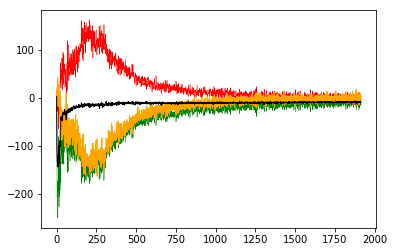

In [24]:
plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot(gan.g_losses, color='orange', linewidth=1)

plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=1)

